# Imports

In [19]:
import pandas as pd
import numpy as np
import json
import torch
import torch.nn as nn
from src import schema as S
from bs4 import BeautifulSoup
import sys
sys.path.insert(0,'../../')

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [21]:
#save a slice
filename = 'jokes_dataset.csv'
raw_df = pd.read_csv('../data/'+filename, sep=',',
                encoding='utf-8').set_index('id')

# work with copy
df = raw_df.copy(deep=True)

# Preprocessing

In [22]:
from src.preprocessing.preprocessing import SimplePreprocessor

# use just title
preprocessor = SimplePreprocessor(full_joke=False)

# Dataset augmenting

In [23]:
import nlpaug.augmenter.word as naw

aug_syn = naw.SynonymAug(aug_src='wordnet', aug_min=1, aug_max=1)

In [24]:
from src.augmenting.augmenting import Augmenter

augmenter = Augmenter(aug_syn)

# Dataset convertor

In [25]:
from src.text2seq.convertor import Text2SeqConvertor

convertor = Text2SeqConvertor()

# Model

In [26]:
# from src.models.CNN_simple import JokeRankPredictor

# JokeRankPredictor

# Pipline

In [27]:
from src.pipeline.pipeline import Pipeline

pipeline = Pipeline(
                 preprocessor = preprocessor,
                 augmenter = None, # augmenter, # None
                 convertor = convertor,
                 model_name = 'CNNGlobalMaxPooling',  # 'CNNSimple', 
                 splitting_params = {'test_size': 0.2,
                                     'shuffle': True},
                 )


In [28]:
 %%time
train_df, val_df, test_df = pipeline.prepare_data(df)

DEBUG:pipeline-log:Starting preprocessing
DEBUG:pipeline-log:Splitting dataset on train, val and test
DEBUG:pipeline-log:Make vocabulary
DEBUG:pipeline-log:Split data to train/val/test after making vocabulary
Wall time: 3min 22s


In [29]:
train_df.shape, val_df.shape ,test_df.shape

((111525, 3), (27882, 3), (34852, 3))

# Train

In [30]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam

In [31]:
iteration_list, loss_list, accuracy_list = pipeline.train_model(learning_rate,
                                                               criterion,
                                                               optimizer,
                                                               train_df,
                                                               val_df,
                                                               epochs=5,
                                                               checkpoint_path='../checkpoints/cnn_simple_TITLE_best_checkpoint')

INFO:pipeline-log:Fitting model
Epoch 0


  0%|          | 0/871 [00:00<?, ?it/s]

Iteration: 99  Loss: 1.5955079793930054  Accuracy: 28.842981338500977 %
Saving model and optimizer state at iteration 99 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 199  Loss: 1.5816929340362549  Accuracy: 28.114912033081055 %
Iteration: 299  Loss: 1.5812218189239502  Accuracy: 31.5472354888916 %
Saving model and optimizer state at iteration 299 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 399  Loss: 1.576661229133606  Accuracy: 31.945341110229492 %
Saving model and optimizer state at iteration 399 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 499  Loss: 1.5659064054489136  Accuracy: 32.171295166015625 %
Saving model and optimizer state at iteration 499 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 599  Loss: 1.6006160974502563  Accuracy: 32.131839752197266 %
Iteration: 699  Loss: 1.5249751806259155  Accuracy: 32.29682159423828 %
Saving model and optimizer state at iteration 699 to ../checkpoints/cnn_simple_TITLE_best_c

  0%|          | 0/871 [00:00<?, ?it/s]

Iteration: 899  Loss: 1.4978023767471313  Accuracy: 32.32551574707031 %
Iteration: 999  Loss: 1.530794382095337  Accuracy: 32.13542938232422 %
Iteration: 1099  Loss: 1.612662672996521  Accuracy: 32.418766021728516 %
Saving model and optimizer state at iteration 1099 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 1199  Loss: 1.5588561296463013  Accuracy: 32.669822692871094 %
Saving model and optimizer state at iteration 1199 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 1299  Loss: 1.5370525121688843  Accuracy: 32.659061431884766 %
Iteration: 1399  Loss: 1.520052194595337  Accuracy: 32.60885238647461 %
Iteration: 1499  Loss: 1.5270529985427856  Accuracy: 32.637542724609375 %
Iteration: 1599  Loss: 1.499017596244812  Accuracy: 32.741554260253906 %
Saving model and optimizer state at iteration 1599 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 1699  Loss: 1.5535578727722168  Accuracy: 32.60526657104492 %
Epoch 2


  0%|          | 0/871 [00:00<?, ?it/s]

Iteration: 1799  Loss: 1.5687916278839111  Accuracy: 32.583744049072266 %
Iteration: 1899  Loss: 1.4871985912322998  Accuracy: 32.486907958984375 %
Iteration: 1999  Loss: 1.5686579942703247  Accuracy: 32.74872589111328 %
Saving model and optimizer state at iteration 1999 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 2099  Loss: 1.547935128211975  Accuracy: 32.63395690917969 %
Iteration: 2199  Loss: 1.5415921211242676  Accuracy: 32.52277374267578 %
Iteration: 2299  Loss: 1.536156415939331  Accuracy: 32.72720718383789 %
Iteration: 2399  Loss: 1.5721542835235596  Accuracy: 32.863494873046875 %
Saving model and optimizer state at iteration 2399 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 2499  Loss: 1.52178156375885  Accuracy: 32.885013580322266 %
Saving model and optimizer state at iteration 2499 to ../checkpoints/cnn_simple_TITLE_best_checkpoint
Iteration: 2599  Loss: 1.487267255783081  Accuracy: 32.7989387512207 %
Epoch 3


  0%|          | 0/871 [00:00<?, ?it/s]

Iteration: 2699  Loss: 1.5450303554534912  Accuracy: 32.691341400146484 %
Iteration: 2799  Loss: 1.5291680097579956  Accuracy: 32.3111686706543 %
Iteration: 2899  Loss: 1.5442763566970825  Accuracy: 32.547882080078125 %
Iteration: 2999  Loss: 1.5399068593978882  Accuracy: 32.0457649230957 %
Iteration: 3099  Loss: 1.548401117324829  Accuracy: 32.37572479248047 %
Iteration: 3199  Loss: 1.5598100423812866  Accuracy: 32.637542724609375 %
Iteration: 3299  Loss: 1.5180569887161255  Accuracy: 32.43669891357422 %
Iteration: 3399  Loss: 1.5357879400253296  Accuracy: 32.73079299926758 %
Epoch 4


  0%|          | 0/871 [00:00<?, ?it/s]

Iteration: 3499  Loss: 1.5401577949523926  Accuracy: 32.52994918823242 %
Iteration: 3599  Loss: 1.497702956199646  Accuracy: 31.310522079467773 %
Iteration: 3699  Loss: 1.4854986667633057  Accuracy: 32.45104217529297 %
Iteration: 3799  Loss: 1.5121656656265259  Accuracy: 31.224445343017578 %
Iteration: 3899  Loss: 1.4913876056671143  Accuracy: 31.941755294799805 %
Iteration: 3999  Loss: 1.5168424844741821  Accuracy: 31.608205795288086 %
Iteration: 4099  Loss: 1.451322078704834  Accuracy: 32.067283630371094 %
Iteration: 4199  Loss: 1.5791741609573364  Accuracy: 31.956100463867188 %
Iteration: 4299  Loss: 1.5546889305114746  Accuracy: 32.063697814941406 %


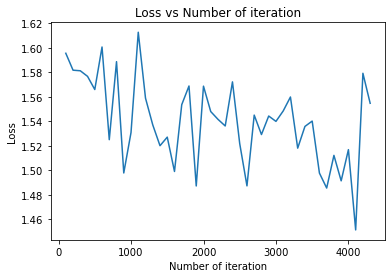

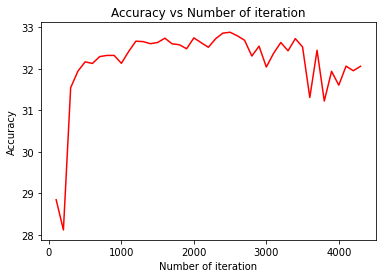

In [32]:
pipeline.draw_curves(iteration_list, loss_list, accuracy_list)

In [33]:
pred = pipeline.predict(test_df, checkpoint_path='../checkpoints/cnn_simple_TITLE_best_checkpoint')

INFO:pipeline-log:Starting prediction
Loading checkpoint '../checkpoints/cnn_simple_TITLE_best_checkpoint'
Loaded checkpoint '../checkpoints/cnn_simple_TITLE_best_checkpoint' from iteration 2499


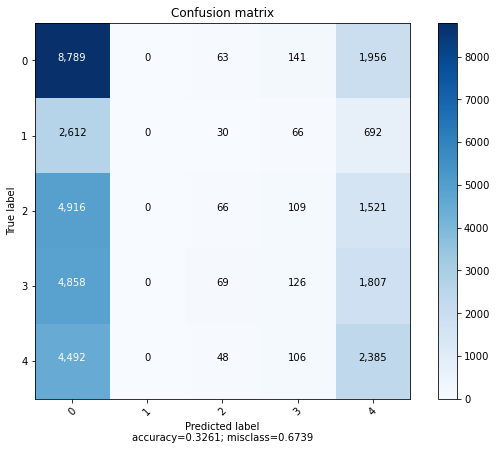

Accuracy: 0.32612 
Balanced accuracy: 0.23406 
Multiclass f1-score: 
    micro: 0.32612 
    macro: 0.16863 
    weighted: 0.22367


Classification report:

              precision    recall  f1-score   support

           0    0.34242   0.80272   0.48006     10949
           1    0.00000   0.00000   0.00000      3400
           2    0.23913   0.00998   0.01916      6612
           3    0.22993   0.01837   0.03402      6860
           4    0.28525   0.33921   0.30990      7031

    accuracy                        0.32612     34852
   macro avg    0.21935   0.23406   0.16863     34852
weighted avg    0.25575   0.32612   0.22367     34852



In [34]:
pipeline.get_scores(test_df[S.TARGET].values, pred)

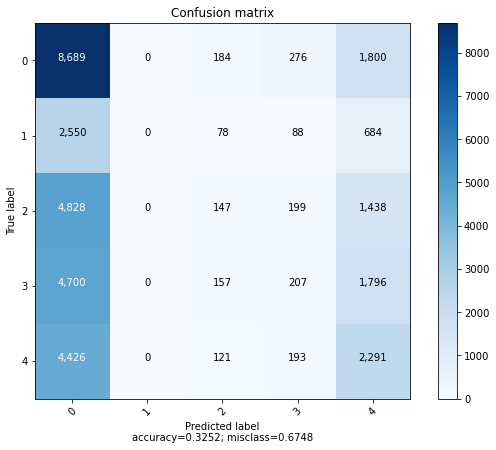

Accuracy: 0.3252 
Balanced accuracy: 0.23437 
Multiclass f1-score: 
    micro: 0.3252 
    macro: 0.17574 
    weighted: 0.23057


Classification report:

              precision    recall  f1-score   support

           0    0.34490   0.79359   0.48083     10949
           1    0.00000   0.00000   0.00000      3400
           2    0.21397   0.02223   0.04028      6612
           3    0.21495   0.03017   0.05292      6860
           4    0.28605   0.32584   0.30465      7031

    accuracy                        0.32520     34852
   macro avg    0.21198   0.23437   0.17574     34852
weighted avg    0.24896   0.32520   0.23057     34852



In [18]:
pipeline.get_scores(test_df[S.TARGET].values, pred)

In [ ]:
# + без аугментации